# Generating Rest Frame SEDs from a Parametric Galaxy including dust emission
<br>
Example for generating the rest-frame spectrum for a parametric galaxy including dust emission


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.plt import single, single_histxy, mlabel
from synthesizer.dust import Greybody
from unyt import yr, Myr, K
from astropy.cosmology import Planck18 as cosmo

In [3]:
# Define the grid
grid_name = "test_grid"
grid_dir = "../../../tests/test_grid/"
grid = Grid(grid_name, grid_dir=grid_dir)

In [4]:
# define the parameters of the star formation and metal enrichment histories
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

# define the functional form of the star formation and metal enrichment histories
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

# get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
sfzh = generate_sfzh(grid.log10ages, grid.metallicities, sfh, Zh, stellar_mass=stellar_mass)

# create a galaxy object
galaxy = Galaxy(sfzh)

Simple dust and gas screen


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

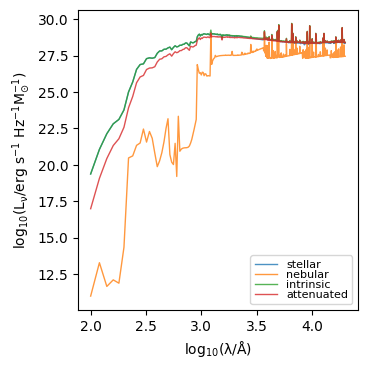

In [5]:
# # --- simple dust and gas screen
galaxy.get_spectra_screen(grid, tauV = 0.1, fesc = 0.5)
print("Simple dust and gas screen")
galaxy.plot_spectra()


In [6]:
print(galaxy.spectra['intrinsic'].get_bolometric_luminosity())
print(galaxy.spectra['attenuated'].get_bolometric_luminosity())

2.9716961699321034e+44 erg/s
1.8985137147311573e+44 erg/s


In [7]:
emissionmodel = Greybody(50*K, 1.5)

[  100.   120.   140.   160.   180.   200.   220.   240.   260.   280.
   300.   320.   340.   360.   380.   400.   420.   440.   460.   480.
   500.   520.   540.   560.   580.   600.   620.   640.   660.   680.
   700.   720.   740.   760.   780.   800.   820.   840.   860.   880.
   900.   920.   940.   960.   980.  1000.  1020.  1040.  1060.  1080.
  1100.  1120.  1140.  1160.  1180.  1200.  1220.  1240.  1260.  1280.
  1300.  1320.  1340.  1360.  1380.  1400.  1420.  1440.  1460.  1480.
  1500.  1520.  1540.  1560.  1580.  1600.  1620.  1640.  1660.  1680.
  1700.  1720.  1740.  1760.  1780.  1800.  1820.  1840.  1860.  1880.
  1900.  1920.  1940.  1960.  1980.  2000.  2020.  2040.  2060.  2080.
  2100.  2120.  2140.  2160.  2180.  2200.  2220.  2240.  2260.  2280.
  2300.  2320.  2340.  2360.  2380.  2400.  2420.  2440.  2460.  2480.
  2500.  2520.  2540.  2560.  2580.  2600.  2620.  2640.  2660.  2680.
  2700.  2720.  2740.  2760.  2780.  2800.  2820.  2840.  2860.  2880.
  2900

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


(<Figure size 350x500 with 1 Axes>,
 <Axes: xlabel='$\\rm log_{10}(\\lambda/\\AA)$', ylabel='$\\rm log_{10}(L_{\\nu}/erg\\ s^{-1}\\ Hz^{-1} M_{\\odot}^{-1})$'>)

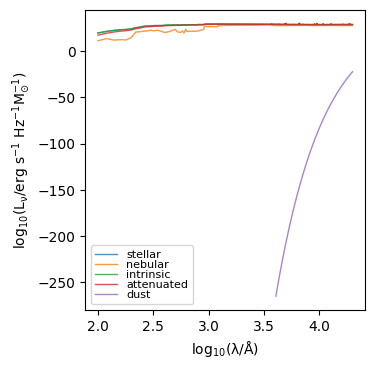

In [8]:
galaxy.get_spectra_dust(emissionmodel)
galaxy.plot_spectra()
